In [2]:
from os import listdir
from os.path import isdir, join
import librosa
import random
import numpy as np
import matplotlib.pyplot as plt
import python_speech_features

In [ ]:
############Extracting Features############

In [3]:
#Dataset path and view possible targets(폴더명보여주는 코드)
dataset_path = 'C:/Users/jmj30/Dropbox/카메라 업로드/Documentation/2020/2020 2학기/project/창의자율과제/DNN프로젝트/data1'
for name in listdir(dataset_path):
    if isdir(join(dataset_path,name)):
        print(name)

backward
bed
bird
cat
dog
down
eight
five
follow
forward
four
go
happy
heylumos
house
learn
left
marvin
nine
no
off
on
one
right
seven
sheila
six
stop
three
tree
two
up
visual
wow
yes
zero
_background_noise_


In [4]:
# Create an all targets list(폴더명 리스트로 생성)
all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path,name))]
print(all_targets)

['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'heylumos', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero', '_background_noise_']


In [5]:
#Leave off background noise set
all_targets.remove('_background_noise_')
all_targets.remove('heylumos')
print(all_targets)


['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero']


In [6]:
#see how many files are in each
num_samples = 0
for target in all_targets:
    print(len(listdir(join(dataset_path,target))))
    num_samples += len(listdir(join(dataset_path,target)))
print('Total samples:', num_samples)


1664
2014
2064
2031
2128
3917
3787
4052
1579
1557
3728
3880
2054
2113
1575
3801
2100
3934
3941
3745
3845
3890
3778
3998
2022
3860
3872
3727
1759
3880
3723
1592
2123
4044
4052
Total samples: 105829


In [9]:
#Settings
target_list = all_targets #all_targets자리
feature_sets_file = 'all_targets_mfcc_sets.npz' #feature들 저장하는 파일
perc_keep_samples = 0.1 #추출하고 훈련할 때 샘플들을 얼마나 사용할것인지(다 사용하는 것이 1.0)
val_ratio = 0.1 #cross_validation 할 data 비율
test_ratio=0.1 #test 할 data 비율
sample_rate = 8000 #16000
num_mfcc = 16 #frame당 mfcc개수
len_mfcc= 16 #mfcc길이

In [10]:
#create list of filenames along with ground truth vector (y)
#파일이름들 절대경로로 가져옴 각각의 feature들 자동으로 추출할수 있게 해줌
filenames = []
y=[]
for index, target in enumerate(target_list):
    print(join(dataset_path, target))
    filenames.append(listdir(join(dataset_path, target)))
    y.append(np.ones(len(filenames[index]))*index) #각각의 절대 경로안에 있는 파일들에 같은 index부여해서 y array로 만듦

C:/Users/jmj30/Dropbox/카메라 업로드/Documentation/2020/2020 2학기/project/창의자율과제/DNN프로젝트/data1\backward
C:/Users/jmj30/Dropbox/카메라 업로드/Documentation/2020/2020 2학기/project/창의자율과제/DNN프로젝트/data1\bed
C:/Users/jmj30/Dropbox/카메라 업로드/Documentation/2020/2020 2학기/project/창의자율과제/DNN프로젝트/data1\bird
C:/Users/jmj30/Dropbox/카메라 업로드/Documentation/2020/2020 2학기/project/창의자율과제/DNN프로젝트/data1\cat
C:/Users/jmj30/Dropbox/카메라 업로드/Documentation/2020/2020 2학기/project/창의자율과제/DNN프로젝트/data1\dog
C:/Users/jmj30/Dropbox/카메라 업로드/Documentation/2020/2020 2학기/project/창의자율과제/DNN프로젝트/data1\down
C:/Users/jmj30/Dropbox/카메라 업로드/Documentation/2020/2020 2학기/project/창의자율과제/DNN프로젝트/data1\eight
C:/Users/jmj30/Dropbox/카메라 업로드/Documentation/2020/2020 2학기/project/창의자율과제/DNN프로젝트/data1\five
C:/Users/jmj30/Dropbox/카메라 업로드/Documentation/2020/2020 2학기/project/창의자율과제/DNN프로젝트/data1\follow
C:/Users/jmj30/Dropbox/카메라 업로드/Documentation/2020/2020 2학기/project/창의자율과제/DNN프로젝트/data1\forward
C:/Users/jmj30/Dropbox/카메라 업로드/Documentation/2020/2020 2학기/proj

In [11]:
#check ground truth Y vector
print(y)
for item in y:
    print(len(item)) 

[array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]), array([2., 2., 2., ..., 2., 2., 2.]), array([3., 3., 3., ..., 3., 3., 3.]), array([4., 4., 4., ..., 4., 4., 4.]), array([5., 5., 5., ..., 5., 5., 5.]), array([6., 6., 6., ..., 6., 6., 6.]), array([7., 7., 7., ..., 7., 7., 7.]), array([8., 8., 8., ..., 8., 8., 8.]), array([9., 9., 9., ..., 9., 9., 9.]), array([10., 10., 10., ..., 10., 10., 10.]), array([11., 11., 11., ..., 11., 11., 11.]), array([12., 12., 12., ..., 12., 12., 12.]), array([13., 13., 13., ..., 13., 13., 13.]), array([14., 14., 14., ..., 14., 14., 14.]), array([15., 15., 15., ..., 15., 15., 15.]), array([16., 16., 16., ..., 16., 16., 16.]), array([17., 17., 17., ..., 17., 17., 17.]), array([18., 18., 18., ..., 18., 18., 18.]), array([19., 19., 19., ..., 19., 19., 19.]), array([20., 20., 20., ..., 20., 20., 20.]), array([21., 21., 21., ..., 21., 21., 21.]), array([22., 22., 22., ..., 22., 22., 22.]), array([23., 23., 23., ..., 23., 23., 23.]), arr

In [12]:
#flatten filename and y vectors
filenames = [item for sublist in filenames for item in sublist]
y = [item for sublist in y for item in sublist]

In [13]:
#associate filenames with true output and shuffle
#파일 안에 있는 데이터들을 섞어서 학습을 진행함
filenames_y = list(zip(filenames, y))
random.shuffle(filenames_y)
filenames, y = zip(*filenames_y)

In [14]:
#Only keep the specified number of samples(shorter extraction/training)
print(len(filenames))
filenames = filenames[:int(len(filenames)*perc_keep_samples)]
print(len(filenames))

105829
10582


In [15]:
#calculate validation and test set sizes
val_set_size = int(len(filenames)*val_ratio)
test_set_size = int(len(filenames)*test_ratio)

#break dataset apart into train, validation, and test sets
filenames_val = filenames[:val_set_size]
filenames_test = filenames[val_set_size:(val_set_size+test_set_size)]
filenames_train = filenames[(val_set_size+test_set_size):]

#break y apart into train, validation, and test sets
y_orig_val = y[:val_set_size]
y_orig_test = y[val_set_size:(val_set_size+test_set_size)]
y_orig_train = y[(val_set_size+test_set_size):]

In [16]:
#여기까지 하면 mfcc 추출준비 끝남

In [17]:
#Function: Create MFCC from give path
def calc_mfcc(path):

    #Load wavefile
    #path에서 wav 파일들 가져와서 위에 설정한 sample rate에 맞춰서 변환하는 작업
    signal, fs = librosa.load(path, sr=sample_rate)

    #Create MFCCs from sound clip
    #변환한 wave form에서 mfcc를 추출하는 작업
    mfccs = python_speech_features.base.mfcc(signal,
                                            samplerate=fs,
                                            winlen=0.256, #window size
                                            winstep=0.050, #windo 사이의 거리
                                            numcep=num_mfcc, #처음부터 12만큼의 mfcc가 필요(위에서 설정)
                                            nfilt=26, #default=26 filter
                                            nfft = 2048, #fft를 할때 사용하는 sample의 수는 윈도우 크기에 따름, 기본값은 512, 
                                            #참고 실험에서는 2048이었는데 WARNING:root:frame length (3200) is greater than FFT size (2048), frame will be truncated. Increase NFFT to avoid.
                                            #이 결과 값에 따라서 3200으로 변경
                                            preemph=0.0, #preemphasis filter
                                            ceplifter=0, #lifting opteration on final coefficient(more robust against noise)
                                            appendEnergy=False, #mfcc의 0번째 요소가 종종 버려지기 때문에 이건 그것을 그 프레임 안의 총 에너지를 대신하는 것으로 대신하는 것)
                                            winfunc=np.hanning) #window function: hamming/hanning window 는 FFT가 원하지 않는 요소들을 고주파에서 만들어 내는 것을 막는다
    return mfccs.transpose()

In [18]:
#TEST: Construct test set by computing MFCC of WAV file
#먼저 training data에서 500개 sample에 대해서만 mfcc를 추출(이 경우 144개)
# 각각의 파일들이 12개의 mfcc 모양을 보여줌
prob_cnt = 0
x_test = []
y_test = []
for index, filename in enumerate(filenames_train):
    #Stop after 500
    if index >= 500:
        break

    #create path from given filename and target item
    path = join(dataset_path, target_list[int(y_orig_train[index])],filename)

    #create MFCCs
    mfccs = calc_mfcc(path)

    if mfccs.shape[1] == len_mfcc:
        x_test.append(mfccs)
        y_test.append(y_orig_train[index])
    else:
        print("Dropped:", index, mfccs.shape)
        prob_cnt+=1

Dropped: 8 (16, 14)
Dropped: 64 (16, 11)
Dropped: 69 (16, 13)
Dropped: 80 (16, 12)
Dropped: 89 (16, 6)
Dropped: 111 (16, 12)
Dropped: 112 (16, 11)
Dropped: 144 (16, 11)
Dropped: 158 (16, 12)
Dropped: 159 (16, 14)
Dropped: 164 (16, 13)
Dropped: 174 (16, 15)
Dropped: 181 (16, 10)
Dropped: 187 (16, 12)
Dropped: 203 (16, 8)
Dropped: 222 (16, 12)
Dropped: 226 (16, 14)
Dropped: 260 (16, 15)
Dropped: 266 (16, 15)
Dropped: 274 (16, 13)
Dropped: 275 (16, 15)
Dropped: 294 (16, 15)
Dropped: 298 (16, 14)
Dropped: 302 (16, 11)
Dropped: 309 (16, 14)
Dropped: 311 (16, 11)
Dropped: 334 (16, 8)
Dropped: 359 (16, 14)
Dropped: 378 (16, 6)
Dropped: 380 (16, 11)
Dropped: 382 (16, 12)
Dropped: 384 (16, 9)
Dropped: 387 (16, 7)
Dropped: 389 (16, 10)
Dropped: 392 (16, 14)
Dropped: 408 (16, 11)
Dropped: 425 (16, 8)
Dropped: 437 (16, 14)
Dropped: 439 (16, 7)
Dropped: 446 (16, 14)
Dropped: 458 (16, 13)
Dropped: 464 (16, 15)
Dropped: 469 (16, 15)
Dropped: 472 (16, 13)
Dropped: 487 (16, 9)


In [19]:
#위 결과를 확인했을 때 파일이 손상되었거나 1초가 넘지 않는다며 얼마만큼의 파일들이 그러는지 확인하는 코드
print('% of problematic samples:', prob_cnt/500) #% of problematic samples: 1.0

% of problematic samples: 0.09


MFCCs: [[-5.01746359e+01 -4.45968935e+01 -3.70096203e+01 -2.31143537e+01
  -1.47317613e+01 -1.23276952e+01 -1.54505274e+01 -2.20595072e+01
  -2.45151749e+01 -3.08413559e+01 -4.40171220e+01 -5.23205102e+01
  -5.68765482e+01 -5.87132687e+01 -5.94798769e+01 -5.95328769e+01]
 [-2.54337598e+00 -4.72285545e+00 -2.33327183e+00  4.19248059e-01
  -2.12062563e-01 -5.09614962e-01  8.18768249e-02  1.47706315e+00
   1.92341493e+00  3.30001852e+00  5.50819377e+00  2.90317514e+00
   4.86555642e-01  4.87760290e-01  5.15836919e-01  5.21749253e-02]
 [ 4.31940146e+00  3.97150340e+00  3.94697934e+00 -7.11605429e-01
  -2.16833731e+00 -2.26017389e+00 -1.74966995e+00 -6.72873791e-01
  -4.56106543e-02  1.28231249e+00  4.73181070e+00  6.35903279e+00
   5.60772762e+00  6.32345339e+00  7.02164337e+00  7.06870638e+00]
 [ 1.20535278e+00  5.72533828e-01 -5.96792977e-01 -1.66870182e+00
  -1.90099623e+00 -1.98566936e+00 -1.69963513e+00 -2.94193438e-01
   7.35119004e-01  1.55222838e+00  2.76752931e+00  3.21510260e+00


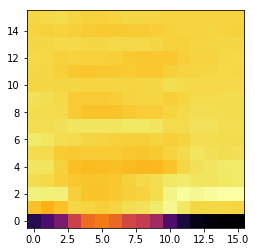

In [20]:
#TEST: test shorter MFCC
#!pip install playsound
from playsound import playsound

idx = 10

#Create path from given filename and target item
path = join(dataset_path, target_list[int(y_orig_train[idx])],filenames_train[idx])

#Create MFCCs
mfccs = calc_mfcc(path)
print("MFCCs:",mfccs)

#plot MFCC
fig = plt.figure()
plt.imshow(mfccs, cmap='inferno',origin='lower')

#TEST: Play problem sounds
print(target_list[int(y_orig_train[idx])])
playsound(path)

In [21]:
#dataset의 quality가 길이가 짧아서 안좋다면 앞뒤에 silence나 백색소음 붙여서 길이를 늘리는 방법과 그냥 그걸 뺴고 train할 수도 있다.
#문제가 있는 sample들 없애고 train 시키기
#Function: Create MFCCs, keeping only ones of desired length
def extract_features(in_files, in_y):
    prob_cnt = 0
    out_x = []
    out_y = []
    
    for index, filename in enumerate(in_files):
        #create path from given filename and target item
        path = join(dataset_path, target_list[int(in_y[index])],filename)
        #check to make sure we're reading a .wav file
        if not path.endswith('.wav'):
            continue
        #create MFCCs
        mfccs = calc_mfcc(path)

        #only keep MFCCs with given lenth
        if mfccs.shape[1] == len_mfcc:
            out_x.append(mfccs)
            out_y.append(in_y[index])
        else:
            print('dropped', index, mfccs.shape)
            prob_cnt += 1
    return out_x,out_y, prob_cnt

In [22]:
#create train, validation, and test sets
x_train, y_train, prob = extract_features(filenames_train,y_orig_train)
print('removed percentage:',prob/len(y_orig_train))
x_val, y_val, prob = extract_features(filenames_val,y_orig_val)
print('removed percentage:',prob/len(y_orig_val))
x_test, y_test, prob = extract_features(filenames_test,y_orig_test)
print('removed percentage:',prob/len(y_orig_test))

dropped 8 (16, 14)
dropped 64 (16, 11)
dropped 69 (16, 13)
dropped 80 (16, 12)
dropped 89 (16, 6)
dropped 111 (16, 12)
dropped 112 (16, 11)
dropped 144 (16, 11)
dropped 158 (16, 12)
dropped 159 (16, 14)
dropped 164 (16, 13)
dropped 174 (16, 15)
dropped 181 (16, 10)
dropped 187 (16, 12)
dropped 203 (16, 8)
dropped 222 (16, 12)
dropped 226 (16, 14)
dropped 260 (16, 15)
dropped 266 (16, 15)
dropped 274 (16, 13)
dropped 275 (16, 15)
dropped 294 (16, 15)
dropped 298 (16, 14)
dropped 302 (16, 11)
dropped 309 (16, 14)
dropped 311 (16, 11)
dropped 334 (16, 8)
dropped 359 (16, 14)
dropped 378 (16, 6)
dropped 380 (16, 11)
dropped 382 (16, 12)
dropped 384 (16, 9)
dropped 387 (16, 7)
dropped 389 (16, 10)
dropped 392 (16, 14)
dropped 408 (16, 11)
dropped 425 (16, 8)
dropped 437 (16, 14)
dropped 439 (16, 7)
dropped 446 (16, 14)
dropped 458 (16, 13)
dropped 464 (16, 15)
dropped 469 (16, 15)
dropped 472 (16, 13)
dropped 487 (16, 9)
dropped 510 (16, 8)
dropped 517 (16, 14)
dropped 527 (16, 12)
dropped 

dropped 4149 (16, 7)
dropped 4161 (16, 10)
dropped 4162 (16, 14)
dropped 4178 (16, 15)
dropped 4191 (16, 6)
dropped 4192 (16, 10)
dropped 4199 (16, 15)
dropped 4205 (16, 15)
dropped 4211 (16, 13)
dropped 4222 (16, 11)
dropped 4226 (16, 8)
dropped 4231 (16, 12)
dropped 4234 (16, 12)
dropped 4247 (16, 13)
dropped 4287 (16, 14)
dropped 4299 (16, 4)
dropped 4315 (16, 14)
dropped 4323 (16, 14)
dropped 4337 (16, 11)
dropped 4353 (16, 14)
dropped 4363 (16, 13)
dropped 4369 (16, 15)
dropped 4394 (16, 11)
dropped 4405 (16, 14)
dropped 4410 (16, 13)
dropped 4411 (16, 11)
dropped 4438 (16, 13)
dropped 4443 (16, 11)
dropped 4445 (16, 12)
dropped 4454 (16, 8)
dropped 4456 (16, 15)
dropped 4471 (16, 7)
dropped 4476 (16, 11)
dropped 4501 (16, 10)
dropped 4505 (16, 4)
dropped 4514 (16, 12)
dropped 4533 (16, 13)
dropped 4544 (16, 11)
dropped 4560 (16, 11)
dropped 4566 (16, 13)
dropped 4567 (16, 7)
dropped 4586 (16, 14)
dropped 4590 (16, 11)
dropped 4602 (16, 14)
dropped 4632 (16, 12)
dropped 4650 (16, 

dropped 8225 (16, 13)
dropped 8243 (16, 10)
dropped 8268 (16, 13)
dropped 8279 (16, 15)
dropped 8294 (16, 11)
dropped 8355 (16, 10)
dropped 8369 (16, 13)
dropped 8379 (16, 14)
dropped 8415 (16, 15)
dropped 8422 (16, 13)
removed percentage: 0.007395408483025272
dropped 3 (16, 11)
dropped 14 (16, 10)
dropped 67 (16, 9)
dropped 68 (16, 9)
dropped 78 (16, 15)
dropped 90 (16, 15)
dropped 101 (16, 14)
dropped 119 (16, 13)
dropped 121 (16, 5)
dropped 126 (16, 8)
dropped 136 (16, 8)
dropped 157 (16, 7)
dropped 165 (16, 13)
dropped 172 (16, 14)
dropped 177 (16, 11)
dropped 197 (16, 14)
dropped 199 (16, 15)
dropped 208 (16, 15)
dropped 227 (16, 11)
dropped 229 (16, 13)
dropped 232 (16, 14)
dropped 234 (16, 9)
dropped 252 (16, 15)
dropped 259 (16, 13)
dropped 260 (16, 13)
dropped 262 (16, 11)
dropped 291 (16, 12)
dropped 312 (16, 13)
dropped 398 (16, 12)
dropped 415 (16, 15)
dropped 430 (16, 14)
dropped 446 (16, 12)
dropped 463 (16, 12)
dropped 488 (16, 14)
dropped 503 (16, 12)
dropped 504 (16, 1

In [24]:
#Save features and truth vector(y) sets to disk
#위 결과에서 나온 손상된 파일들을 제거한 나머지 행렬들을 제일 위에 설정한 npz 파일에 넣어준다
#이는 feature들과 그에 따른 lable을 저장하는 과정   
np.savez(feature_sets_file,
        x_train = x_train,
        y_train = y_train,
        x_val=x_val,
        y_val=y_val,
        x_test=x_test,
        y_test=y_test)

In [25]:
#TEST: Load features
feature_sets = np.load(feature_sets_file)
print(feature_sets.files)

['y_test', 'y_val', 'x_test', 'x_val', 'x_train', 'y_train']


In [26]:
print(len(feature_sets['x_train']))
print(len(feature_sets['y_val']))

7699
978
